In [1]:
import numpy as np
import nnfs 
nnfs.init()

# Section 1

## Without numpy

### A single neuron 

#### Initialize

In [2]:
#Let's initialize for one input
inputs = [1, 2, 3]
weights = [0.2 ,0.8, -0.5]
bias = 2

#### Get the outputs

 - What we want is to multiply each corresponding input by each weights and then add the bias to it. Let's first do it by hand and crate a reusable function


In [3]:
output = (inputs[0] * weights[0] + 
          inputs[1] * weights[1] + 
          inputs[2] * weights[2] +
          bias )
print(output)

2.3


In [4]:
#create a reusable output function 
def out(inputs, weights, bias):
    sum = bias
    for i in range(len(inputs)):
        sum += weights[i] * inputs[i]
    return sum

In [5]:
out(inputs, weights, bias)

2.3000000000000003

In [6]:
# add another input and weight and check results
inputs.append(2.5)
weights.append(1)
out(inputs, weights, bias)

4.800000000000001

### A layer of neurons

#### Initialize

In [7]:
#Let's add two more neurons two the currently available neuron
weights1 = weights
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = bias
bias2 = 3
bias3 = 0.5

#### Get the outputs

In [8]:
#Let's do it by hand first
outputs = [
    inputs[0] * weights1[0] + inputs[1] * weights1[1] + inputs[2] * weights1[2] + inputs[3] * weights1[3] + bias1,
    inputs[0] * weights2[0] + inputs[1] * weights2[1] + inputs[2] * weights2[2] + inputs[3] * weights2[3] + bias2,
    inputs[0] * weights3[0] + inputs[1] * weights3[1] + inputs[2] * weights3[2] + inputs[3] * weights3[3] + bias3,
    ]
outputs

[4.8, 1.21, 2.385]

#### Nesting the weights and biases

As doing this by hand get's very long let's list the weights and biases together for the whole layer

In [9]:
weights = [weights1,
           weights2,
           weights3]
biases = [bias1, bias2, bias3]
print(*weights, biases, sep='\n')

[0.2, 0.8, -0.5, 1]
[0.5, -0.91, 0.26, -0.5]
[-0.26, -0.27, 0.17, 0.87]
[2, 3, 0.5]


#### Creating a loop to do the whole sum in one go

In [10]:
def layer_sum(inputs, weights, biases):
    layer_outputs = []

    #Go through each neuron
    for neuron_weights, neuron_bias in zip(weights,biases):
        neuron_sum = 0

        #go through each input and corresponding weight
        for weight, input in zip(neuron_weights, inputs):
            neuron_sum += weight * input

        neuron_sum += neuron_bias
        #you can replace the whole inner loop and sums with the function we created earlier `out()`

        layer_outputs.append(neuron_sum)
    
    return layer_outputs

layer_sum(inputs,weights,biases)

[4.8, 1.21, 2.385]

## With numpy

- Let's implement the above steps with numpy and see the ease of use

### A single neuron

#### Initialize

In [11]:
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias  = 2.0

#### Output using `np.dot()`

In [12]:
np.dot(np.array(inputs), np.array(weights)) + np.array(bias)

4.799999952316284

### A layer of neurons

#### Initialize as before

In [13]:
inputs = inputs
weights = [[ 0.2 , 0.8 , -0.5 , 1 ],
           [ 0.5 , -0.91 , 0.26 , -0.5 ],
           [ -0.26 , -0.27 , 0.17 , 0.87 ]]
biases = [2.0, 3.0, 0.5]

#### Get the output

In [14]:
layer_outputs = np.dot(np.array(weights), np.array(inputs)) + biases
layer_outputs

array([4.79999995, 1.21000004, 2.38499999])

### Adding the batch dimension

- Before we only looked at one sample of data but usually in any Dense layer the input samples are presented as batches for parallel processing so in this case the theorem is mostly similar but the code is slightly adjusted to fit for this need and the outputs also have a batch dimension.

#### Initialize

In [15]:
inputs = [[ 1.0 , 2.0 , 3.0 , 2.5 ],
[ 2.0 , 5.0 , - 1.0 , 2.0 ],
[ - 1.5 , 2.7 , 3.3 , - 0.8 ]]
weights = [[ 0.2 , 0.8 , - 0.5 , 1.0 ],
[ 0.5 , - 0.91 , 0.26 , - 0.5 ],
[ - 0.26 , - 0.27 , 0.17 , 0.87 ]]
biases = [ 2.0 , 3.0 , 0.5 ]

#### Get outputs

In [16]:
layer_outputs = np.dot(np.array(inputs), np.array(weights).T) + np.array(biases)
layer_outputs

array([[ 4.79999995,  1.21000004,  2.38499999],
       [ 8.9000001 , -1.80999994,  0.19999999],
       [ 1.41000003,  1.051     ,  0.02599999]])

### Adding another layer

#### Initialize the weights and biases
- the number of weights per neuron must match the number of outputs from the last layer

In [17]:
weights2 = [[ 0.1 , - 0.14 , 0.5 ],
[ - 0.5 , 0.12 , - 0.33 ],
[ - 0.44 , 0.73 , - 0.13 ]]
biases2 = [ - 1 , 2 , - 0.5 ]

#### Pass the inputs through both layers

In [18]:
layer1_outputs = np.dot(np.array(inputs), np.array(weights).T) + biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2
layer2_outputs

array([[ 0.50310004, -1.04184985, -2.03874993],
       [ 0.24339998, -2.73320007, -5.76329994],
       [-0.99314   ,  1.41254002, -0.35655001]])

# Training data

In [19]:
import nnfs

nnfs.init()

In [20]:
from nnfs.datasets import spiral_data

In [21]:
X, y = spiral_data(samples=100, classes=3)

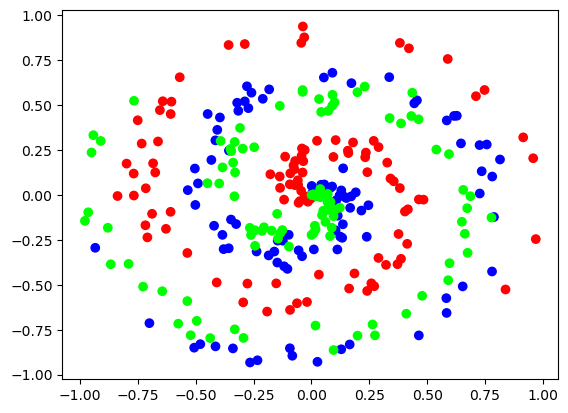

In [22]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.brg)

# Creating reusable `Dense_Layer` class

In [23]:
class Dense_Layer():

    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)#Already transposed
        self.biases = np.zeros(shape=(1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

<a id='code_1'></a>

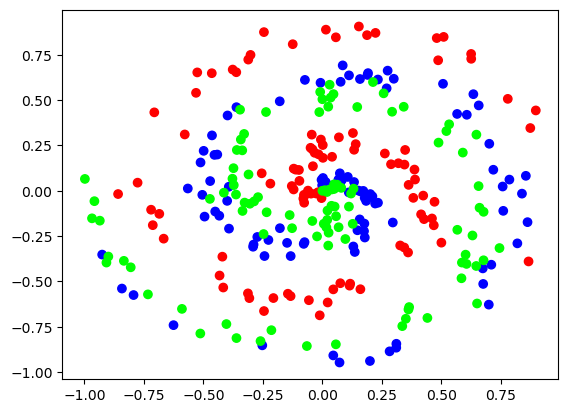

Forwarding through layer 1
Success
Shape of output : (300, 3)
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.11171044e-04 -5.11007493e-05 -1.12099799e-04]
 [ 2.99257295e-06 -2.69126613e-04 -1.45165104e-04]
 [ 8.95101766e-05 -4.30442247e-04 -1.68079801e-04]
 [-3.49893759e-04 -3.07208364e-04 -4.33002861e-04]]


In [24]:
# Check the outputs from this function
X , y = spiral_data(100, 3)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.brg)
plt.show()

layer1 = Dense_Layer(2,3)
print('Forwarding through layer 1')
layer1.forward(X) #X has two inputs
print('Success')

output_layer1 = layer1.output
print('Shape of output :', output_layer1.shape)
print(output_layer1[:5])

# Activation Functions

## Showing the importance of non-linear activation functions
- to show the importance of non-linearity lets create a linear regression model using tensorflow and try to fit the sine function

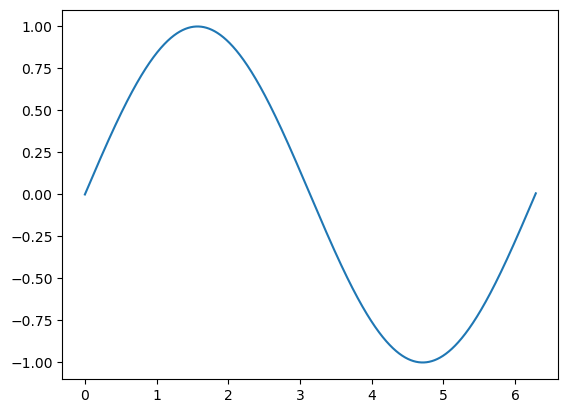

In [25]:
#Create the dataset

x_sin = np.linspace(0,6.29, 10000)
y_sin = np.sin(x_sin)
plt.plot(x_sin, y_sin)


In [26]:
# Create the model creator function 
def create_anc_compile(relu=False):
    act = 'relu' if relu else 'linear'
    import tensorflow as tf
    import keras
    model = keras.Sequential([
        tf.keras.layers.Input(shape=(1,)),
        tf.keras.layers.Dense(8, activation=act),
        tf.keras.layers.Dense(8, activation=act),
        tf.keras.layers.Dense(1, activation='linear')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    model.fit(x_sin, y_sin, shuffle=False, epochs=120, verbose=0)
    preds = model.predict(x_sin)
    plt.figure(figsize=(5,3))
    plt.title(f'Using {act} activation')
    plt.plot(x_sin, y_sin, c='g', label= 'truth')
    plt.plot(x_sin, preds, c='r', label='prediction')
    plt.legend()
    plt.show()

### Linear

313/313 [==============================] - 0s 820us/step


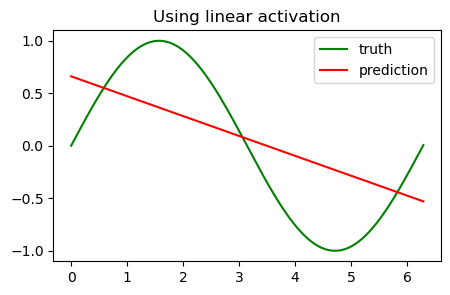

In [27]:
create_anc_compile()

### Non-linear

313/313 [==============================] - 1s 1ms/step


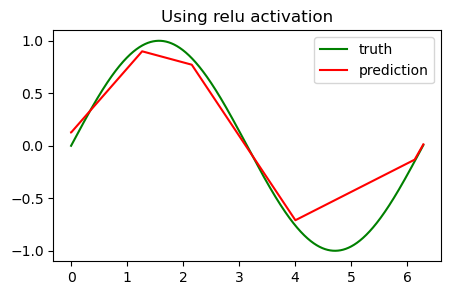

In [28]:
create_anc_compile(True)


 ---
 > # Extremely important
 > 
 > [Watch this video](https://youtu.be/gmjzbpSVY1A?list=PLQVvvaa0QuDcjD5BAw2DxE6OF2tius3V3&t=562)
 >
 ---

## ReLU activation

In [29]:
inp_rel = list(range(-10,10))
out_rel = []
inp_rel

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [30]:
for i in inp_rel:
    out_rel.append(max(0,i))
inp_rel, out_rel

([-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
### We can use numpy easily
out_rel_np = np.maximum(0,inp_rel)
inp_rel, out_rel_np

([-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

## Creating ReLU class

In [32]:
class ReLU_Activation():

    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

### Using this relu class on previous outputs

> Continuation from [code 1](#code_1)

In [33]:
activation_1 = ReLU_Activation()
activation_1.forward(output_layer1)
output_activation1 = activation_1.output
print('Before Activation')
print(output_layer1[:5])
print('After activation')
print(output_activation1[:5])


Before Activation
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.11171044e-04 -5.11007493e-05 -1.12099799e-04]
 [ 2.99257295e-06 -2.69126613e-04 -1.45165104e-04]
 [ 8.95101766e-05 -4.30442247e-04 -1.68079801e-04]
 [-3.49893759e-04 -3.07208364e-04 -4.33002861e-04]]
After activation
[[0.000000e+00 0.000000e+00 0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00]
 [2.992573e-06 0.000000e+00 0.000000e+00]
 [8.951018e-05 0.000000e+00 0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00]]


## Softmax activation

In [34]:
E = np.e
def softmax(outputs):
    t1 = [E ** x for x in outputs]
    sm = sum(t1)
    return [i/sm for i in t1]

In [35]:
tmp = [ 4.8 , 1.21 , 2.385 ]
tmp2 = softmax(tmp)
print(tmp2)
print(sum(tmp2))

[0.8952826639572619, 0.024708306782099374, 0.0800090292606387]
0.9999999999999999


In [36]:
# Using numpy
tmp = np.array([[ 4.8 , 1.21 , 2.385 ],
[ 8.9 , - 1.81 , 0.2 ],
[ 1.41 , 1.051 , 0.026 ]])
np.exp(tmp)/np.sum(np.exp(tmp), axis=-1, keepdims=True)

array([[8.95282664e-01, 2.47083068e-02, 8.00090293e-02],
       [9.99811129e-01, 2.23163963e-05, 1.66554348e-04],
       [5.13097164e-01, 3.58333899e-01, 1.28568936e-01]])

## Creating Softmax class

In [37]:
class Softmax_Activation():

    def forward(self, inputs):
        exps = np.exp(inputs-np.max(inputs, axis=-1, keepdims=True))
        self.output = exps/ np.sum(exps, axis=-1, keepdims=True)

# Using all we built together
<a id='code_2'></a>

### Data

#### Create the data

In [38]:
# Create the data
X,y  = spiral_data(samples=100, classes=3)

#### Visualize the data

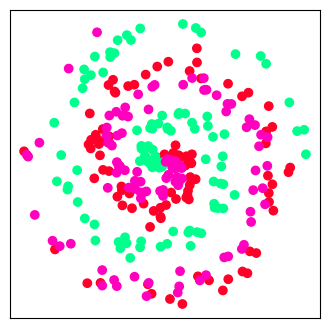

In [39]:
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.gist_rainbow)
plt.xticks([])
plt.yticks([])
plt.show()

### Modelling

#### Create the model

In [40]:
#layer 1
dense_1 = Dense_Layer(2, 3)

#activation 1
activation_1 = ReLU_Activation()

#layer 2 
dense_2 = Dense_Layer(n_inputs=3, n_neurons=3)

#activation 2 
activation_2 = Softmax_Activation()

#### Forward pass through the model

In [41]:
dense_1.forward(X)
layer_1_outputs = dense_1.output
activation_1.forward(layer_1_outputs)
activation_1_outputs = activation_1.output
dense_2.forward(activation_1_outputs)
layer_2_outputs = dense_2.output
activation_2.forward(layer_2_outputs)
activation_2_outputs = activation_2.output


In [42]:
activation_2_outputs[:5]

array([[0.33333334, 0.33333334, 0.33333334],
       [0.33333418, 0.33333272, 0.33333308],
       [0.3333347 , 0.33333236, 0.33333296],
       [0.33333558, 0.33333167, 0.33333272],
       [0.3333367 , 0.3333308 , 0.3333324 ]], dtype=float32)

# Loss Functions

## Categorical Cross-Entropy Loss

### Pure python code

In [43]:
# Value of Eular's number
import math
E = math.e
E

2.718281828459045

In [44]:
loss = [-math.log(probs[y[i]])for i,probs in enumerate(activation_2_outputs)]
loss[:5]

[1.0986122588657878,
 1.0986097554739154,
 1.098608146153878,
 1.0986055533659322,
 1.0986021559298342]

### Using numpy

In [45]:
loss_singular = -np.log(activation_2_outputs[range(len(activation_2_outputs)),list(y)])
np.mean(loss_singular)

1.0986176

In [46]:
#to prevent edge errors of log we will clip both ends of the predictions
#np.clip(activation_2_outputs, 1e-7, 1-1e-7)

### Creating a Class for Categorical Crossentropy

In [47]:
# As we will create more loss functions let's make a common Loss class
class Loss():

    def calculate(self, preds, y):

        losses = self.forward(preds, y)

        return np.mean(losses)

In [48]:
#inherit from loss class
class CategoricalCrossentropy(Loss):

    def forward(self, preds, truth):

        n_samples = len(truth)

        clipped_preds = np.clip(preds, 1e-7, 1-1e-7)
        
        #if sparsely encoded
        if len(truth.shape) == 1:
            confidences = clipped_preds[range(n_samples), truth]
        
        #if one_hot encoded
        elif len(truth.shape) == 2:
            confidences = np.sum(clipped_preds * truth, axis=1)
            
        return -np.log(confidences)

> Continuation from [Using all we built together](#code_2)

In [49]:
loss_fn1 = CategoricalCrossentropy()
loss_model_1 = loss_fn1.calculate(activation_2_outputs, y)

In [50]:
loss_model_1

1.0986176

### Accuracy

In [51]:
def accuracy(preds, truth):
    # handling one_hot
    if truth.ndim == 2:
        truth = np.argmax(truth, axis=1)
    preds = np.argmax(preds, axis=1)
    return np.mean(preds==truth)

In [52]:
accuracy(activation_2_outputs, y)

0.3333333333333333

# Optimization

## Random initialization

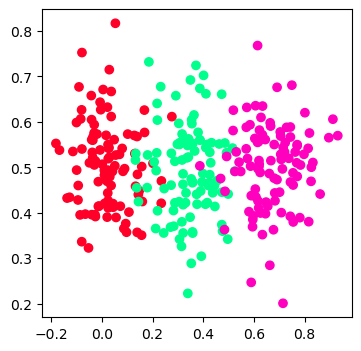

In [53]:
# Let's create a more simple dataset
from nnfs.datasets import vertical_data

X, y = vertical_data(samples=100, classes=3)
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c = y, cmap=plt.cm.gist_rainbow)
plt.xticks()
plt.yticks()
plt.show()

In [54]:
epochs = 10000
hidden_layer_nodes = 3
lowest_loss = 99999
dense_1 = Dense_Layer(2, hidden_layer_nodes)
relu_1 = ReLU_Activation()
dense_2 = Dense_Layer(hidden_layer_nodes, 3)
softmax_1 = Softmax_Activation()
lossfunc = CategoricalCrossentropy()

for _ in range(epochs):
    dense_1.weights = 0.05 * np.random.randn(*dense_1.weights.shape)
    dense_1.biases = 0.05 * np.random.randn(*dense_1.biases.shape)
    dense_2.weights = 0.05 * np.random.randn(*dense_2.weights.shape)
    dense_2.biases = 0.05 * np.random.randn(*dense_2.biases.shape)
     
    dense_1.forward(X)
    relu_1.forward(dense_1.output)
    dense_2.forward(relu_1.output)
    softmax_1.forward(dense_2.output)
    loss = lossfunc.calculate(softmax_1.output, y)
    acc = accuracy(softmax_1.output, y)

    if loss < lowest_loss:
        print(f'epoch : {_ + 1}/{epochs}\n---------------------------------------------------\nLoss has decreased from {lowest_loss} to {loss}\n accuracy : {acc}')
        lowest_loss = loss
        dense_1_weights = dense_1.weights.copy()
        dense_1_biases = dense_1.biases.copy()
        dense_2_weights = dense_2.weights.copy()
        dense_2_biases = dense_2.biases.copy()
        print('')
    

epoch : 1/10000
---------------------------------------------------
Loss has decreased from 99999 to 1.098744511604309
 accuracy : 0.3333333333333333

epoch : 5/10000
---------------------------------------------------
Loss has decreased from 1.098744511604309 to 1.0983238220214844
 accuracy : 0.3333333333333333

epoch : 28/10000
---------------------------------------------------
Loss has decreased from 1.0983238220214844 to 1.096948504447937
 accuracy : 0.3333333333333333

epoch : 1136/10000
---------------------------------------------------
Loss has decreased from 1.096948504447937 to 1.0964627265930176
 accuracy : 0.3333333333333333

epoch : 3820/10000
---------------------------------------------------
Loss has decreased from 1.0964627265930176 to 1.0963661670684814
 accuracy : 0.3333333333333333

epoch : 5364/10000
---------------------------------------------------
Loss has decreased from 1.0963661670684814 to 1.0958675146102905
 accuracy : 0.58



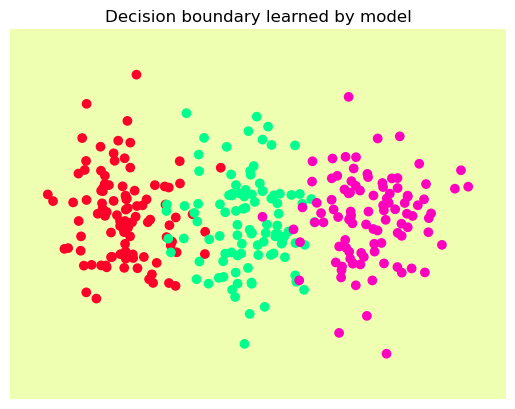

In [55]:
def plot_preds_1():
    ymi, yma, xmi, xma = X.transpose()[1].min() - 0.1, X.transpose()[1].max() + 0.1,X.transpose()[0].min()- 0.1, X.transpose()[0].max() + 0.1
    a = np.linspace(xmi,xma, 2000)
    b = np.linspace(ymi,yma, 2000)
    xx,yy = np.meshgrid(a,b)
    data = np.c_[xx.ravel(),yy.ravel()]
    dense_1.forward(data)
    relu_1.forward(dense_1.output)
    dense_2.forward(relu_1.output)
    softmax_1.forward(dense_2.output)
    preders = np.argmax(softmax_1.output, axis=1)
    plt.figure()
    plt.contourf(xx,yy, preders.reshape((2000,2000)),cmap=plt.cm.gist_rainbow, alpha = 0.3)
    plt.scatter(X.transpose()[0],X.transpose()[1], c = y, cmap=plt.cm.gist_rainbow,alpha=1)
    plt.title('Decision boundary learned by model')
    plt.axis(False)
    plt.show()
plot_preds_1()

## Random adjustment
- Code is same as Random initialization but instead of initializing every time we add to current weights and restore best weights if loss does not reduce

In [56]:
epochs = 10000
hidden_layer_nodes = 3
lowest_loss = 99999
dense_1 = Dense_Layer(2, hidden_layer_nodes)
relu_1 = ReLU_Activation()
dense_2 = Dense_Layer(hidden_layer_nodes, 3)
softmax_1 = Softmax_Activation()
lossfunc = CategoricalCrossentropy()

for _ in range(epochs):
    dense_1.weights += 0.05 * np.random.randn(*dense_1.weights.shape)
    dense_1.biases += 0.05 * np.random.randn(*dense_1.biases.shape)
    dense_2.weights += 0.05 * np.random.randn(*dense_2.weights.shape)
    dense_2.biases += 0.05 * np.random.randn(*dense_2.biases.shape)
     
    dense_1.forward(X)
    relu_1.forward(dense_1.output)
    dense_2.forward(relu_1.output)
    softmax_1.forward(dense_2.output)
    loss = lossfunc.calculate(softmax_1.output, y)
    acc = accuracy(softmax_1.output, y)

    if loss < lowest_loss:
        print(f'epoch : {_ + 1}/{epochs}\n---------------------------------------------------\nLoss has decreased from {lowest_loss} to {loss}\n accuracy : {acc}')
        lowest_loss = loss
        dense_1_weights = dense_1.weights.copy()
        dense_1_biases = dense_1.biases.copy()
        dense_2_weights = dense_2.weights.copy()
        dense_2_biases = dense_2.biases.copy()
        print('')
    else:
        dense_1.weights = dense_1_weights.copy()
        dense_1.biases = dense_1_biases.copy()
        dense_2.weights = dense_2_weights.copy()
        dense_2.biases = dense_2_biases.copy()

epoch : 1/10000
---------------------------------------------------
Loss has decreased from 99999 to 1.0992566347122192
 accuracy : 0.3333333333333333

epoch : 17/10000
---------------------------------------------------
Loss has decreased from 1.0992566347122192 to 1.0988746881484985
 accuracy : 0.3333333333333333

epoch : 22/10000
---------------------------------------------------
Loss has decreased from 1.0988746881484985 to 1.0966914892196655
 accuracy : 0.3333333333333333

epoch : 25/10000
---------------------------------------------------
Loss has decreased from 1.0966914892196655 to 1.096348524093628
 accuracy : 0.3333333333333333

epoch : 27/10000
---------------------------------------------------
Loss has decreased from 1.096348524093628 to 1.0961793661117554
 accuracy : 0.3333333333333333

epoch : 28/10000
---------------------------------------------------
Loss has decreased from 1.0961793661117554 to 1.0952434539794922
 accuracy : 0.3333333333333333

epoch : 29/10000
---

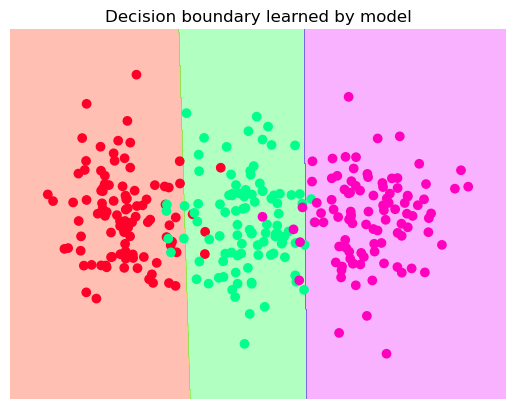

In [57]:
def plot_preds_1():
    ymi, yma, xmi, xma = X.transpose()[1].min() - 0.1, X.transpose()[1].max() + 0.1,X.transpose()[0].min()- 0.1, X.transpose()[0].max() + 0.1
    a = np.linspace(xmi,xma, 2000)
    b = np.linspace(ymi,yma, 2000)
    xx,yy = np.meshgrid(a,b)
    data = np.c_[xx.ravel(),yy.ravel()]
    dense_1.forward(data)
    relu_1.forward(dense_1.output)
    dense_2.forward(relu_1.output)
    softmax_1.forward(dense_2.output)
    preders = np.argmax(softmax_1.output, axis=1)
    plt.figure()
    plt.contourf(xx,yy, preders.reshape((2000,2000)),cmap=plt.cm.gist_rainbow, alpha = 0.3)
    plt.scatter(X.transpose()[0],X.transpose()[1], c = y, cmap=plt.cm.gist_rainbow,alpha=1)
    plt.title('Decision boundary learned by model')
    plt.axis(False)
    plt.show()
plot_preds_1()

### Trying this with spiral data

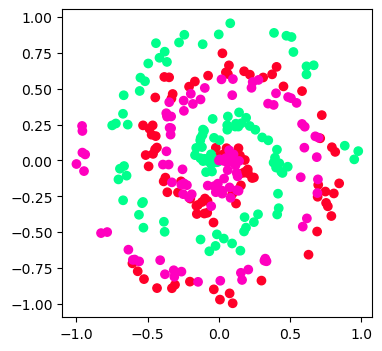

epoch : 1/10000
---------------------------------------------------
Loss has decreased from 99999 to 1.1012063026428223
 accuracy : 0.3333333333333333

epoch : 2/10000
---------------------------------------------------
Loss has decreased from 1.1012063026428223 to 1.098899245262146
 accuracy : 0.35333333333333333

epoch : 5/10000
---------------------------------------------------
Loss has decreased from 1.098899245262146 to 1.0984879732131958
 accuracy : 0.3333333333333333

epoch : 8/10000
---------------------------------------------------
Loss has decreased from 1.0984879732131958 to 1.0981206893920898
 accuracy : 0.35

epoch : 11/10000
---------------------------------------------------
Loss has decreased from 1.0981206893920898 to 1.0980405807495117
 accuracy : 0.35

epoch : 13/10000
---------------------------------------------------
Loss has decreased from 1.0980405807495117 to 1.0971252918243408
 accuracy : 0.37333333333333335

epoch : 19/10000
--------------------------------

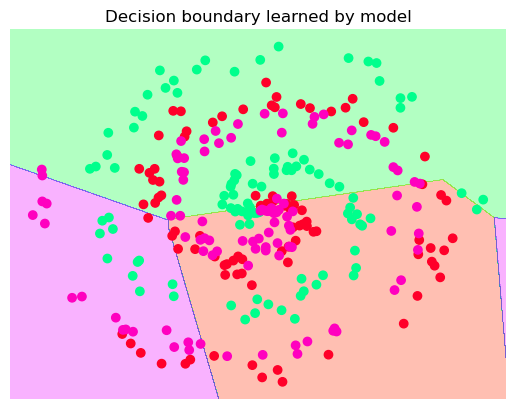

In [58]:
X, y = spiral_data(samples=100, classes=3)
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c = y, cmap=plt.cm.gist_rainbow)
plt.xticks()
plt.yticks()
plt.show()

epochs = 10000
hidden_layer_nodes = 3
lowest_loss = 99999
dense_1 = Dense_Layer(2, hidden_layer_nodes)
relu_1 = ReLU_Activation()
dense_2 = Dense_Layer(hidden_layer_nodes, 3)
softmax_1 = Softmax_Activation()
lossfunc = CategoricalCrossentropy()

for _ in range(epochs):
    dense_1.weights += 0.05 * np.random.randn(*dense_1.weights.shape)
    dense_1.biases += 0.05 * np.random.randn(*dense_1.biases.shape)
    dense_2.weights += 0.05 * np.random.randn(*dense_2.weights.shape)
    dense_2.biases += 0.05 * np.random.randn(*dense_2.biases.shape)
     
    dense_1.forward(X)
    relu_1.forward(dense_1.output)
    dense_2.forward(relu_1.output)
    softmax_1.forward(dense_2.output)
    loss = lossfunc.calculate(softmax_1.output, y)
    acc = accuracy(softmax_1.output, y)

    if loss < lowest_loss:
        print(f'epoch : {_ + 1}/{epochs}\n---------------------------------------------------\nLoss has decreased from {lowest_loss} to {loss}\n accuracy : {acc}')
        lowest_loss = loss
        dense_1_weights = dense_1.weights.copy()
        dense_1_biases = dense_1.biases.copy()
        dense_2_weights = dense_2.weights.copy()
        dense_2_biases = dense_2.biases.copy()
        print('')
    else:
        dense_1.weights = dense_1_weights.copy()
        dense_1.biases = dense_1_biases.copy()
        dense_2.weights = dense_2_weights.copy()
        dense_2.biases = dense_2_biases.copy()

def plot_preds_1():
    ymi, yma, xmi, xma = X.transpose()[1].min() - 0.1, X.transpose()[1].max() + 0.1,X.transpose()[0].min()- 0.1, X.transpose()[0].max() + 0.1
    a = np.linspace(xmi,xma, 2000)
    b = np.linspace(ymi,yma, 2000)
    xx,yy = np.meshgrid(a,b)
    data = np.c_[xx.ravel(),yy.ravel()]
    dense_1.forward(data)
    relu_1.forward(dense_1.output)
    dense_2.forward(relu_1.output)
    softmax_1.forward(dense_2.output)
    preders = np.argmax(softmax_1.output, axis=1)
    plt.figure()
    plt.contourf(xx,yy, preders.reshape((2000,2000)),cmap=plt.cm.gist_rainbow, alpha = 0.3)
    plt.scatter(X.transpose()[0],X.transpose()[1], c = y, cmap=plt.cm.gist_rainbow,alpha=1)
    plt.title('Decision boundary learned by model')
    plt.axis(False)
    plt.show()
plot_preds_1()

# Optimizing Using gradients
- Instead of randdomly adjusting let's adjust the parameters using the gradients of each parameter relative to the loss so we can get the loss function as close to a minimum as possible

## FIrst layer

### Using only one sample 

Let's calculate the gradients of the first layer only 
- In this situation we have 4 inputs and 3 neurons so the weights are an array of shape (4,3) transposed

In [59]:
# Let's assume the gradients received from th next layer to this 3 neurons is a vector of 1s
dvalues = np.ones(shape=(1,3))
dvalues

array([[1., 1., 1.]])

In [60]:
weights = np.array(
    object=[[ 0.2 , 0.8 , - 0.5 , 1 ],
            [ 0.5 , - 0.91 , 0.26 , - 0.5 ],
            [ - 0.26 , - 0.27 , 0.17 , 0.87 ]]
).T

In [61]:
dx0 = sum (weights[ 0 ] * dvalues[ 0 ])
dx1 = sum (weights[ 1 ] * dvalues[ 0 ])
dx2 = sum (weights[ 2 ] * dvalues[ 0 ])
dx3 = sum (weights[ 3 ] * dvalues[ 0 ])
dinputs = np.array([dx0, dx1, dx2, dx3])
print (dinputs)

[ 0.44 -0.38 -0.07  1.37]


In [62]:
np.dot(dvalues, weights.T)

array([[ 0.44, -0.38, -0.07,  1.37]], dtype=float32)

### Using batches
- for visualization perpuses we will only take a batch of 3

In [63]:
dvalues = np.array([[ 1. , 1. , 1. ],
[ 2. , 2. , 2. ],
[ 3. , 3. , 3. ]])

#each row represents a sample of data

In [64]:
weights = np.array([[ 0.2 , 0.8 , - 0.5 , 1 ],
[ 0.5 , - 0.91 , 0.26 , - 0.5 ],
[ - 0.26 , - 0.27 , 0.17 , 0.87 ]]).T
# weights are the same as before

In [65]:
#Simply get the gradients of each input by the dot product
dinputs = np.dot(dvalues, weights.T)
dinputs

array([[ 0.44, -0.38, -0.07,  1.37],
       [ 0.88, -0.76, -0.14,  2.74],
       [ 1.32, -1.14, -0.21,  4.11]], dtype=float32)

to calculate the gradients of the weights we have to dot product the inputs transposed with the gradient values received

In [66]:
inputs = np.array([[ 1 , 2 , 3 , 2.5 ],
[ 2. , 5. , - 1. , 2 ],
[ - 1.5 , 2.7 , 3.3 , - 0.8 ]])

In [67]:
dweights = np.dot(inputs.T, dvalues)
dweights

array([[ 0.5,  0.5,  0.5],
       [20.1, 20.1, 20.1],
       [10.9, 10.9, 10.9],
       [ 4.1,  4.1,  4.1]], dtype=float32)

to calucalate the gradients of the biases as the derivative of a constant is 0 we just have to sum the value of each gradient passed for each sample 

In [68]:
biases = np.array([[ 2 , 3 , 0.5 ]])

In [69]:
dbiases = np.sum(dvalues, axis=0, keepdims=True)
dbiases

array([[6., 6., 6.]])

## Applying the derivative of Relu

In [70]:
# Example layer output with 4 neurons and 3 samples
z = np.array([[ 1 , 2 , - 3 , - 4 ],
[ 2 , - 7 , - 1 , 3 ],
[ - 1 , 2 , 5 , - 1 ]])
dvalues = np.array([[ 1 , 2 , 3 , 4 ],
[ 5 , 6 , 7 , 8 ],
[ 9 , 10 , 11 , 12 ]])

In [71]:
drelu = (z>0).astype(np.int32)
print(drelu)

[[1 1 0 0]
 [1 0 0 1]
 [0 1 1 0]]


In [72]:
#now we multtiply by the dvalues
drelu*= dvalues
drelu

array([[ 1,  2,  0,  0],
       [ 5,  0,  0,  8],
       [ 0, 10, 11,  0]])

In [73]:
# we can shorten this as 
z = np.array([[ 1 , 2 , - 3 , - 4 ],
[ 2 , - 7 , - 1 , 3 ],
[ - 1 , 2 , 5 , - 1 ]])
dvalues = np.array([[ 1 , 2 , 3 , 4 ],
[ 5 , 6 , 7 , 8 ],
[ 9 , 10 , 11 , 12 ]])
drelu = dvalues.copy()
drelu[z<=0] =0 
drelu

array([[ 1,  2,  0,  0],
       [ 5,  0,  0,  8],
       [ 0, 10, 11,  0]])

## Doing one forward and backward pass for a whole layer

In [74]:
dvalues = np.array([[ 1. , 1. , 1. ],
[ 2. , 2. , 2. ],
[ 3. , 3. , 3. ]])

# We have 3 sets of inputs - samples

inputs = np.array([[ 1 , 2 , 3 , 2.5 ],
[ 2. , 5. , - 1. , 2 ],
[ - 1.5 , 2.7 , 3.3 , - 0.8 ]])

# We have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights
# recall that we keep weights transposed

weights = np.array([[ 0.2 , 0.8 , - 0.5 , 1 ],
[ 0.5 , - 0.91 , 0.26 , - 0.5 ],
[ - 0.26 , - 0.27 , 0.17 , 0.87 ]]).T

# One bias for each neuron
# biases are the row vector with a shape (1, neurons)

biases = np.array([[ 2 , 3 , 0.5 ]])

In [75]:
# Forward pass

layer_1_outputs = np.dot(inputs, weights) + biases
relu_outputs = np.maximum(0, layer_1_outputs)

# Calculating gradients

drelu = dvalues.copy()
drelu[layer_1_outputs <=0] = 0

dinputs = np.dot(drelu, weights.T)

dweights = np.dot(inputs.T, drelu)

dbiases = np.sum(dbiases, axis=0, keepdims=True)

In [76]:
dinputs, dweights, dbiases

(array([[ 0.44, -0.38, -0.07,  1.37],
        [-0.12,  1.06, -0.66,  3.74],
        [ 1.32, -1.14, -0.21,  4.11]], dtype=float32),
 array([[ 0.5, -3.5,  0.5],
        [20.1, 10.1, 20.1],
        [10.9, 12.9, 10.9],
        [ 4.1,  0.1,  4.1]], dtype=float32),
 array([[6., 6., 6.]]))

In [77]:
# Back propagation step
weights -= 0.001 * dweights
biases -= 0.001 * dbiases
weights, biases

(array([[ 0.1995,  0.5035, -0.2605],
        [ 0.7799, -0.9201, -0.2901],
        [-0.5109,  0.2471,  0.1591],
        [ 0.9959, -0.5001,  0.8659]]),
 array([[1.994, 2.994, 0.494]]))

## Adding backward methods to existing Dense and Relu Classes

In [78]:
# Dense Layer with backpropagation
class Dense_Layer():

    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)#Already transposed
        self.biases = np.zeros(shape=(1, n_neurons))

    def forward(self, inputs : np.ndarray):
        self.output = np.dot(inputs, self.weights) + self.biases
        # Saving the inputs for backpropagation using
        self.inputs = inputs

    # Backward propagation method
    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        self.dinputs = np.dot(dvalues, self.weights.T)
    

In [79]:
# ReLU activation with backpropagation
class ReLU_Activation():

    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        #Save the inputs for backpropagation
        self.inputs = inputs

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

## Gradient of Categorical crossentropy

In [80]:
class CategoricalCrossentropy(Loss):

    def forward(self, preds, truth):

        n_samples = len(truth)

        clipped_preds = np.clip(preds, 1e-7, 1-1e-7)
        
        #if sparsely encoded
        if len(truth.shape) == 1:
            confidences = clipped_preds[range(n_samples), truth]
            truth = np.eye(len(preds[0]))[truth]
        
        #if one_hot encoded
        elif len(truth.shape) == 2:
            confidences = np.sum(clipped_preds * truth, axis=1)

        #save the predictions and truths for backpropagation
        self.preds = preds
        self.truth = truth

        return -np.log(confidences)
    
    #Adding backward propagation
    def backward(self, truth, preds):

        n_samples = len(truth)
        
        if len(truth.shape) == 1:
            truth = np.eye(len(preds[0]))[truth]
        self.dinputs = (-truth/preds)/n_samples

## Gradient of Softmax Activation

In [81]:
class Softmax_Activation():

    def forward(self, inputs):

        self.inputs = inputs

        exps = np.exp(inputs-np.max(inputs, axis=-1, keepdims=True))
        self.output = exps/ np.sum(exps, axis=-1, keepdims=True)
    
    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues) 
        for i , (output, dvalue) in enumerate(zip(self.output, dvalues)):
            output = np.expand_dims(output, axis=-1)
            jac = np.diagflat(output) - np.dot(output, output.T)

            self.dinputs[i] = np.dot(jac,dvalue)

## Common class for softmax and categorical crossentropy

As both these layers mostly come together let's create a combined function 
> Derivative of both loss and softmax is `y^hat - y` so let's optimize using our knowledge on one_hot encoders

In [82]:
class CategoricalCrossentropyWithSoftmax():

    def __init(self):
        self.activation = Softmax_Activation()
        self.loss = CategoricalCrossentropy()

    def forward(self, inputs, truth):

        self.activation.forward(inputs)
        self.output = self.activation.output

        return self.loss.calculate(self.output, truth) 
    
    def backward(self, preds, truth):

        samples = preds.shape[0]

        if len(truth.shape) == 2:
            truth = np.argmax(truth, axis = -1)

        self.dinputs = preds.copy()

        self.dinputs[range(samples), truth] -= 1

        self.dinputs /= samples

### Testing if combined function outputs are same as separated
- No need to check forward propagation as steps are same and easy

#### Sample truths and predictions

In [83]:
softmax_outputs = np.array([[ 0.7 , 0.1 , 0.2 ],
[ 0.1 , 0.5 , 0.4 ],
[ 0.02 , 0.9 , 0.08 ]])

class_targets = np.array([ 0 , 1 , 1 ])


#### Defining layer

In [84]:
test_softmax = Softmax_Activation()
test_loss = CategoricalCrossentropy()
test_loss_softmax = CategoricalCrossentropyWithSoftmax()

#### Performing Backpropagation

In [85]:
#Separated Layers
test_loss.backward(class_targets, softmax_outputs)
test_loss_grads = test_loss.dinputs
test_softmax.output = softmax_outputs
test_softmax.backward(test_loss_grads)
test_softmax_grads = test_softmax.dinputs
print('Final Grads Separated: ', test_softmax_grads)

#Combined Layers
test_loss_softmax.backward(softmax_outputs, class_targets)
test_softmax_loss_grads = test_loss_softmax.dinputs
print('Final Grads Combined: ', test_softmax_loss_grads)

print(np.isclose(test_softmax_grads, test_softmax_loss_grads))

Final Grads Separated:  [[-0.09999999  0.03333334  0.06666667]
 [ 0.03333334 -0.16666667  0.13333334]
 [ 0.00666667 -0.03333333  0.02666667]]
Final Grads Combined:  [[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


## Comparison
- The main reason we used the combined method is as it only does a simple subtraction it is much more faster then computing using separate methods

In [86]:
from timeit import timeit

In [110]:
def sep():
    test_softmax = Softmax_Activation()
    test_loss = CategoricalCrossentropy()
    test_loss.backward(class_targets, softmax_outputs)
    test_softmax.output = softmax_outputs
    test_softmax.backward(test_loss.dinputs)
    test_softmax_grads = test_softmax.dinputs

def com():
    test_loss_softmax = CategoricalCrossentropyWithSoftmax()
    test_loss_softmax.backward(softmax_outputs, class_targets)
    test_softmax_loss_grads = test_loss_softmax.dinputs

septime = timeit(lambda : sep(), number=10000)
comtime = timeit(lambda : com(), number=10000)
print(septime/comtime)

6.849888548400597


10.289682547129901